### First step to Installing seaborn and import libraries, Which are help to performe some special task.

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### import dataset with the help of read_csv method.

In [3]:
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.shape # shape method : it return tupple, in tupple first value is rows and second is columns.

(550068, 10)

In [5]:
df.describe() # describe method : return all aggregate perfomance at every column

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### Unique values in columns

In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Now we check, is there any null values in columns or not? And we also check the datatype of columns. with the use of info method

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 31.5+ MB


In [8]:
### there is no null values in dataset columns.

## Orders distribution in cities

#### Univariate[Catecorial]

In [9]:
df['City_Category'].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

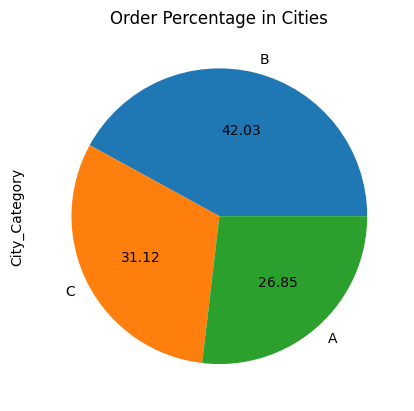

In [10]:
df['City_Category'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.title("Order Percentage in Cities")
plt.show()

### Numbers of ordered by each age group in Gender wise 

In [11]:
df.groupby(by=['Age'])[['Age','Gender']].value_counts()

Age    Gender
0-17   M          10019
       F           5083
18-25  M          75032
       F          24628
26-35  M         168835
       F          50752
36-45  M          82843
       F          27170
46-50  M          32502
       F          13199
51-55  M          28607
       F           9894
55+    M          16421
       F           5083
dtype: int64

## Top 10 Users who ordered the most. 

<AxesSubplot:xlabel='User_ID,Gender'>

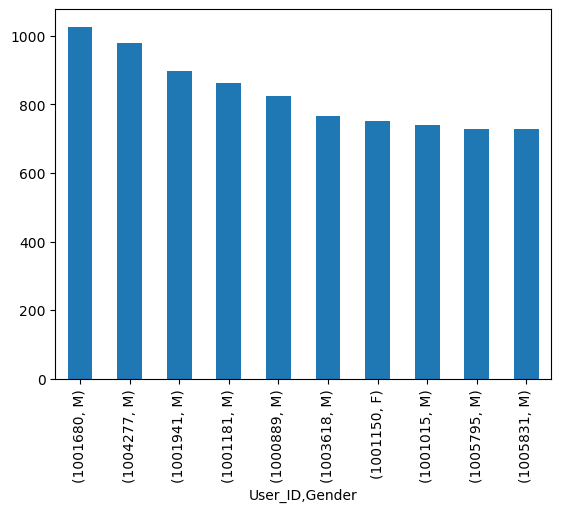

In [12]:
df.groupby(by='User_ID')['Gender'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

## Most product category, which are purchased by customers.

In [13]:
pd.crosstab(index=df['Gender'], columns=df['Product_Category'], values=df['Product_Category'], aggfunc='count')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


<AxesSubplot:>

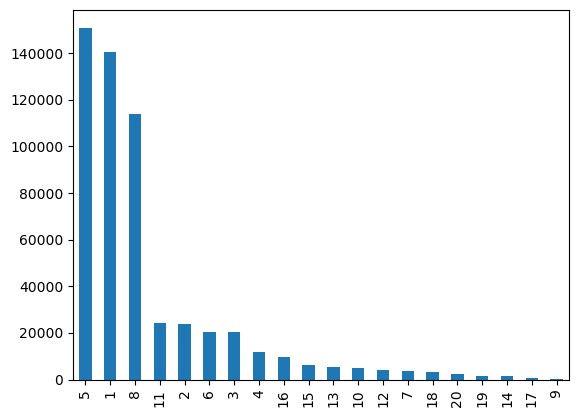

In [14]:
df['Product_Category'].value_counts().plot(kind='bar')

 ###  Bivariate[Categroical-categorical]

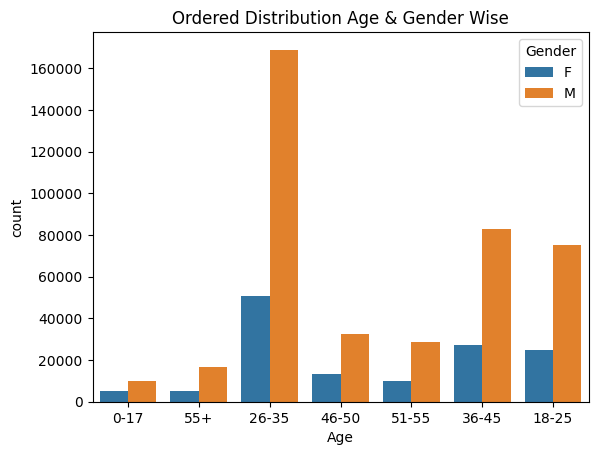

In [15]:
sns.countplot(x=df['Age'], hue=df['Gender'])
plt.title("Ordered Distribution Age & Gender Wise")
plt.show()

#
### Multivariate[numerical-categorial-categorial]

In [16]:
groupby_data = df.groupby(by=['User_ID','Gender','Age'])['Purchase'].mean().reset_index()

In [17]:
groupby_data.head(5) # Groupby userid, gender, age to get userid, age & gender wise purchase mean

,User_ID,Gender,Age,Purchase
0,1000001,F,0-17,9545.514286
1,1000002,M,55+,10525.610390
2,1000003,M,26-35,11780.517241
3,1000004,M,46-50,14747.714286
4,1000005,M,26-35,7745.292453


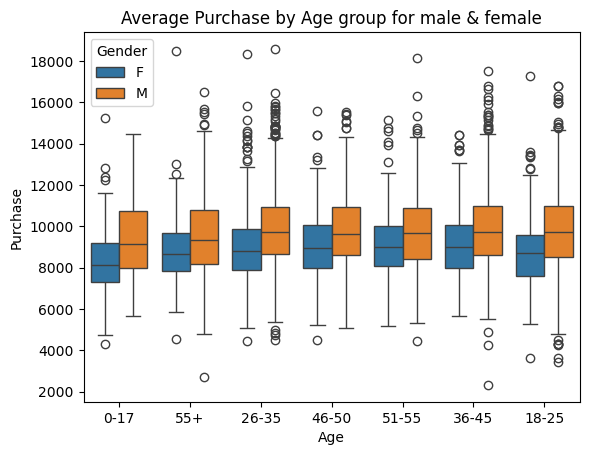

In [18]:
sns.boxplot(y=groupby_data['Purchase'],x = groupby_data['Age'], hue=groupby_data['Gender'])
plt.title('Average Purchase by Age group for male & female')
plt.show()

In [19]:
# as we saw above plot in every age group male are dominating in every group. 

## Product category purchased by married,unmarrid and male and female

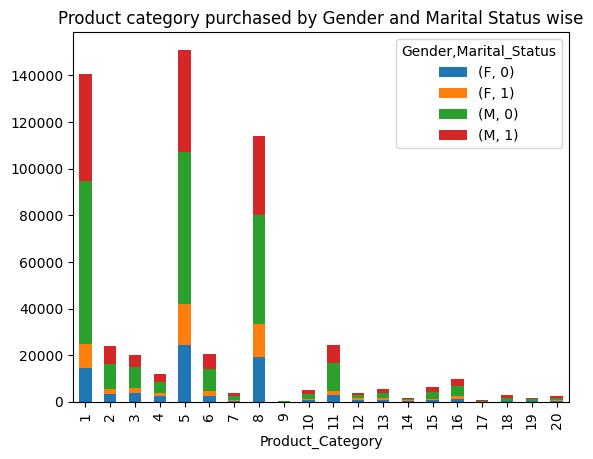

In [107]:
pd.crosstab(columns=[df['Gender'],df['Marital_Status']],index=df['Product_Category'], values=df['Product_Category'], aggfunc='count').plot(kind='bar',stacked=True)
plt.title('Product category purchased by Gender and Marital Status wise')
plt.show()

## Total Purchase by Occupation Marital Status wise 

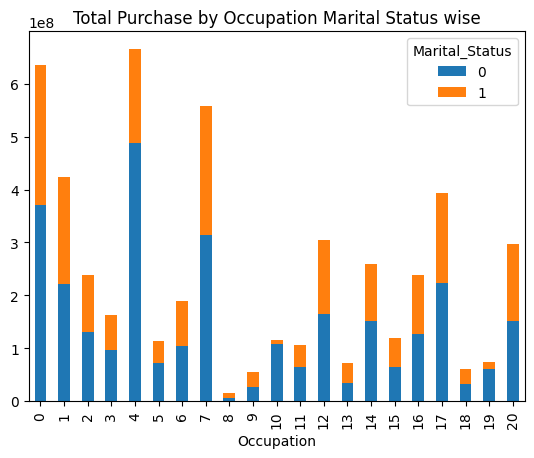

In [106]:
pd.crosstab(columns=df['Marital_Status'],index=df['Occupation'], values=df['Purchase'], aggfunc='sum').plot(kind='bar',stacked=True)
plt.title('Total Purchase by Occupation Marital Status wise')
plt.show() # 0 for unmarried , 1 for married

## Pairplot to analyzing the User_ID, purchase by Gender wise

In [21]:
# Males are purchasing more rather females.

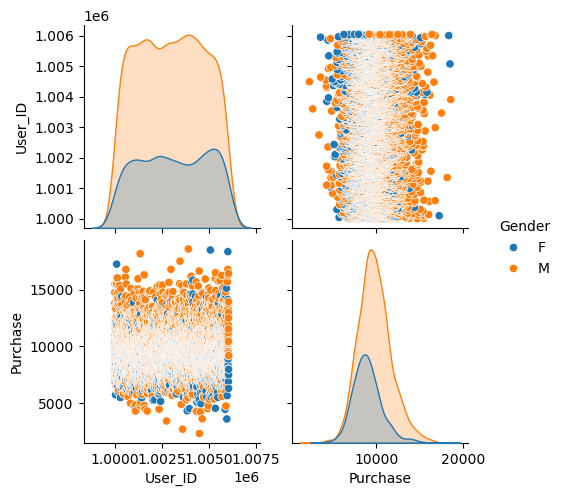

In [22]:
sns.pairplot(groupby_data, hue='Gender')

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

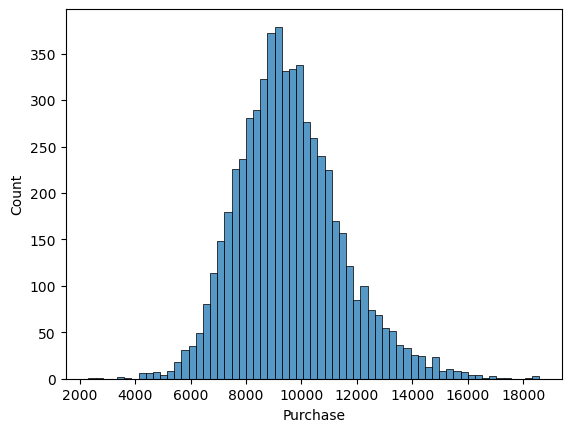

In [23]:
sns.histplot(df.groupby(by='User_ID')['Purchase'].mean())

 # *Now we get Condfidence interval for population data with using sample data at 95% CL(confidence level)*

### As we know there are 5891 customers in sample data, but In real word this data is much more than sample data, so that using bootstrapping technique on sample data we create population data, then we get CI(confidence interval) for some columns.

In [24]:
df['User_ID'].nunique()

5891

In [25]:
# In above histplot if we say our max time average purchase lies at 10000. but it is not ture because it not enough data to tell. 
# now we create a larger sample that is close to our population data and then we get a range where my avg purchase will lie.


In [26]:
sample_means = df.groupby(by='User_ID')['Purchase'].mean()
sample_means.head(2)

User_ID
1000001     9545.514286
1000002    10525.610390
Name: Purchase, dtype: float64

In [27]:
bootstrapped_pop_data = []
for i in range(10000):
    pop_sample = np.random.choice(sample_means,5891).mean()
    bootstrapped_pop_data.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_data,2.5)
x2 = np.percentile(bootstrapped_pop_data,97.5)
x1,x2

(9520.176159216322, 9616.512224107782)

In [28]:
# for population data our 95% Avg Purchase is between 9520.93429788474 and 9617.717189837693.

## Now we take out CI for Females customer avg purchase.

In [29]:
female_data = df.loc[df['Gender']=='F']
female_data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [30]:
female_sample = female_data.groupby(by='User_ID')['Purchase'].mean()
female_sample.head(2), len(female_sample)                                #**there are 1666 females in sample data**

(User_ID
 1000001    9545.514286
 1000006    8083.617021
 Name: Purchase, dtype: float64,
 1666)

In [31]:
bootstrapped_pop_female = []
for i in range(10000):
    pop_sample = np.random.choice(female_sample,1666).mean()
    bootstrapped_pop_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_female,2.5)
x2 = np.percentile(bootstrapped_pop_female,97.5)
x1,x2

(8881.6747385921, 9048.32518398725)

## Now we take out CI for Males customer avg purchase.

In [32]:
male_data = df.loc[df['Gender']=='M']
male_data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227


In [33]:
male_sample = male_data.groupby(by='User_ID')['Purchase'].mean()
male_sample.head(2), len(male_sample)                                #**there are 4225 males in sample data**

(User_ID
 1000002    10525.610390
 1000003    11780.517241
 Name: Purchase, dtype: float64,
 4225)

In [34]:
bootstrapped_pop_male = []
for i in range(10000):
    pop_sample = np.random.choice(male_sample,4225).mean()
    bootstrapped_pop_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_male,2.5)
x2 = np.percentile(bootstrapped_pop_male,97.5)
x1,x2


(9749.654552383674, 9863.923208978222)

<AxesSubplot:>

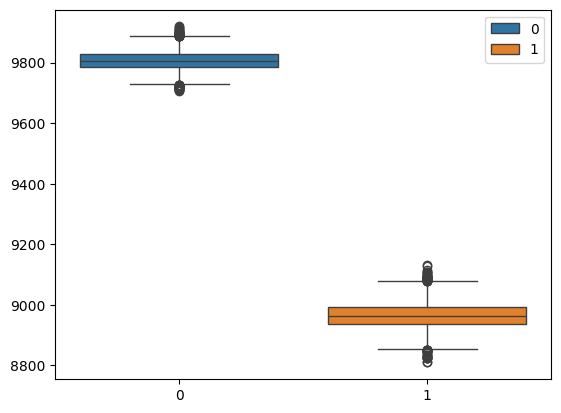

In [35]:
legend = ['male','female']
sns.boxplot([bootstrapped_pop_male,bootstrapped_pop_female], legend=legend)
# plt.legend('male','female')

In [36]:
# 0 for male & 1 for female
# as we see there is no overlapping in male and female CI, so that the difference is significant.

### outliers for male and female

In [37]:
male_q1 = np.percentile(bootstrapped_pop_male,25)
male_q2 = np.percentile(bootstrapped_pop_male,50)
male_q3 = np.percentile(bootstrapped_pop_male,75)
iqr = male_q3-male_q1
upper_outlier = male_q3 + iqr*1.5
lower_outlier = male_q1 - iqr*1.5
upper_outlier,lower_outlier

(9887.166391386785, 9726.360979130226)

In [38]:
female_q1 = np.percentile(bootstrapped_pop_female,25)
female_q2 = np.percentile(bootstrapped_pop_female,50)
female_q3 = np.percentile(bootstrapped_pop_female,75)
iqr = female_q3-female_q1
upper_outlier = female_q3 + iqr*1.5
lower_outlier = female_q1 - iqr*1.5
upper_outlier,lower_outlier

(9078.733390663105, 8850.925488528805)

# Avg purchase CI for male and female at marital status

In [39]:
# first we take out CI at marital status

In [40]:
unmarried = df.loc[df['Marital_Status']==0]
married = df.loc[df['Marital_Status']==1]

In [41]:
# purchase CI for unmarried :
unmarried_sample = unmarried.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_unmarried = []
for i in range(10000):
    pop_sample = np.random.choice(unmarried_sample,3417).mean()
    bootstrapped_pop_unmarried.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_unmarried,2.5)
x2 = np.percentile(bootstrapped_pop_unmarried,97.5)
x1,x2

(9500.202669887702, 9626.681447767969)

In [42]:
# purchase CI for married :
married_sample = married.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_married = []
for i in range(10000):
    pop_sample = np.random.choice(married_sample,2474).mean()
    bootstrapped_pop_married.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_married,2.5)
x2 = np.percentile(bootstrapped_pop_married,97.5)
x1,x2

(9499.720797874932, 9650.791159657823)

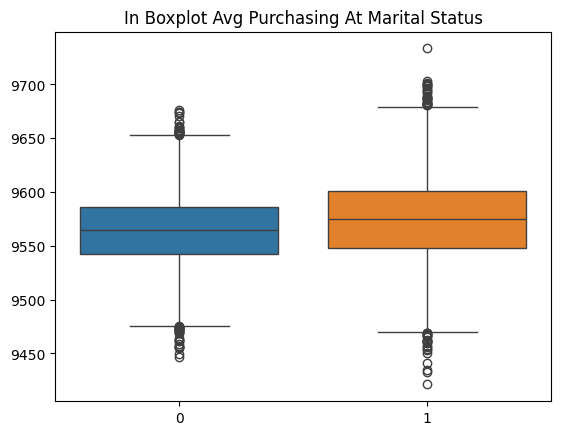

In [43]:
sns.boxplot([bootstrapped_pop_unmarried,bootstrapped_pop_married])
plt.title('In Boxplot Avg Purchasing At Marital Status')
plt.show()

In [44]:
# in above boxplot 0 for unmarried and 1 for married. 
# Avg purchasing CI at marital status are higly overlapping, so that the difference is not significant.  

In [45]:
# To Seprate the data in multiple dataset
groupby_data = df.groupby(by=['Gender','Marital_Status'])
married_male = groupby_data.get_group(('M',1))
married_female = groupby_data.get_group(('F',1))

## For Married :

In [46]:
# purchase CI for married male :
married_male_sample = married_male.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_married_male = []
for i in range(10000):
    pop_sample = np.random.choice(married_male_sample,1755).mean()
    bootstrapped_pop_married_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_married_male,2.5)
x2 = np.percentile(bootstrapped_pop_married_male,97.5)
x1,x2

(9706.726127503802, 9886.671196861775)

In [47]:
# purchase CI for married female :
married_female_sample = married_female.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_married_female = []
for i in range(10000):
    pop_sample = np.random.choice(married_female_sample,1755).mean()
    bootstrapped_pop_married_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_married_female,2.5)
x2 = np.percentile(bootstrapped_pop_married_female,97.5)
x1,x2

(8949.636999770844, 9115.785388716657)

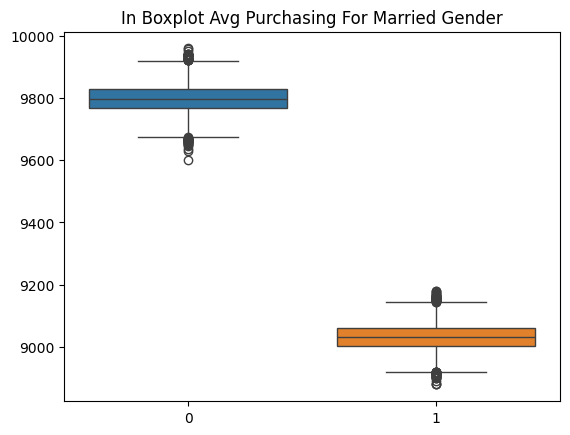

In [48]:
sns.boxplot([bootstrapped_pop_married_male,bootstrapped_pop_married_female])
plt.title('In Boxplot Avg Purchasing For Married Gender')
plt.show()

In [49]:
# in above boxplot 0 for married male and 1 for married female. 
# In above chart there is no overlapping between two boxes, so that the difference is significant.  

# for unmarried :

In [50]:
# for unmarried :
unmarried_male = groupby_data.get_group(('M',0))
unmarried_female = groupby_data.get_group(('F',0))

In [51]:
# purchase CI for unmarried female :
unmarried_female_sample = unmarried_female.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_unmarried_female = []
for i in range(10000):
    pop_sample = np.random.choice(unmarried_female_sample,947).mean()
    bootstrapped_pop_unmarried_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_unmarried_female,2.5)
x2 = np.percentile(bootstrapped_pop_unmarried_female,97.5)
x1,x2 #,len(unmarried_female_sample)

(8807.759781923107, 9019.033576233962)

In [52]:
# purchase CI for unmarried male :
unmarried_male_sample = unmarried_male.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_unmarried_male = []
for i in range(10000):
    pop_sample = np.random.choice(unmarried_male_sample,2470).mean()
    bootstrapped_pop_unmarried_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_unmarried_male,2.5)
x2 = np.percentile(bootstrapped_pop_unmarried_male,97.5)
x1,x2  #, len(unmarried_male_sample)

(9739.163588898084, 9889.047815313104)

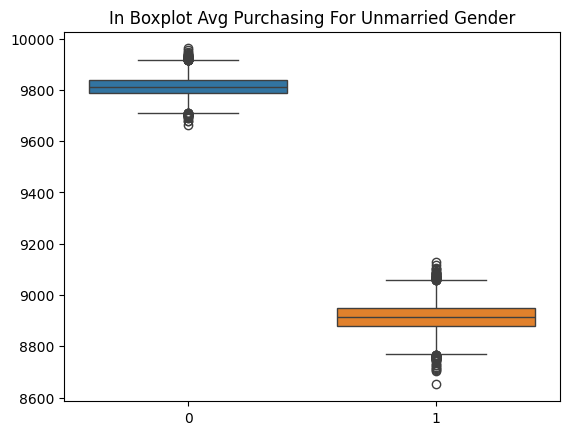

In [53]:
sns.boxplot([bootstrapped_pop_unmarried_male,bootstrapped_pop_unmarried_female])
plt.title('In Boxplot Avg Purchasing For Unmarried Gender')
plt.show()

In [54]:
# in above boxplot 0 for unmarried male and 1 for unmarried female. 
# In above chart there is no overlapping between two boxes, so that the difference is significant.  

## CI (confidence interval) of avg purchasing for Age groups at 95% confidence level.

In [55]:
# Saperate the data in Age groups :

In [56]:
groupby_age = df.groupby(by=['Age'])

In [57]:
age0_17 = groupby_age.get_group('0-17')
age18_25 = groupby_age.get_group('18-25')
age26_35 = groupby_age.get_group('26-35')
age36_45 = groupby_age.get_group('36-45')
age46_50 = groupby_age.get_group('46-50')
age51_55 = groupby_age.get_group('51-55')
age_above_55 = groupby_age.get_group('55+')

In [58]:
# purchase CI for 0-17 Age Group :
age0_17_sample = age0_17.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age0_17 = []
for i in range(10000):
    pop_sample = np.random.choice(age0_17_sample,218).mean()
    bootstrapped_pop_age0_17.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age0_17,2.5)
x2 = np.percentile(bootstrapped_pop_age0_17,97.5)
x1,x2

(8730.110357620471, 9243.611070052755)

In [59]:
# purchase CI for 18-25 Age Group :
age18_25_sample = age18_25.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age18_25 = []
for i in range(10000):
    pop_sample = np.random.choice(age18_25_sample,1069).mean()
    bootstrapped_pop_age18_25.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age18_25,2.5)
x2 = np.percentile(bootstrapped_pop_age18_25,97.5)
x1,x2

(9396.692890284963, 9636.635011612118)

In [60]:
# purchase CI for 26-35 Age Group :
age26_35_sample = age26_35.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age26_35 = []
for i in range(10000):
    pop_sample = np.random.choice(age26_35_sample,2053).mean()
    bootstrapped_pop_age26_35.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age26_35,2.5)
x2 = np.percentile(bootstrapped_pop_age26_35,97.5)
x1,x2

(9528.33807785611, 9686.498442451943)

In [61]:
# purchase CI for 36-45 Age Group :
age36_45_sample = age36_45.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age36_45 = []
for i in range(10000):
    pop_sample = np.random.choice(age36_45_sample,1167).mean()
    bootstrapped_pop_age36_45.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age36_45,2.5)
x2 = np.percentile(bootstrapped_pop_age36_45,97.5)
x1,x2

(9580.587489210775, 9793.26610301074)

In [62]:
# purchase CI for 46-50 Age Group :
age46_50_sample = age46_50.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age46_50 = []
for i in range(10000):
    pop_sample = np.random.choice(age46_50_sample,531).mean()
    bootstrapped_pop_age46_50.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age46_50,2.5)
x2 = np.percentile(bootstrapped_pop_age46_50,97.5)
x1,x2

(9410.382829245165, 9723.21574063593)

In [63]:
# purchase CI for 51-55 Age Group :
age51_55_sample = age51_55.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age51_55 = []
for i in range(10000):
    pop_sample = np.random.choice(age51_55_sample,481).mean()
    bootstrapped_pop_age51_55.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age51_55,2.5)
x2 = np.percentile(bootstrapped_pop_age51_55,97.5)
x1,x2

(9461.628746627895, 9804.938961032876)

In [64]:
# purchase CI for 55+ Age Group :
age_above_55_sample = age_above_55.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_age_above_55 = []
for i in range(10000):
    pop_sample = np.random.choice(age_above_55_sample,372).mean()
    bootstrapped_pop_age_above_55.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_age_above_55,2.5)
x2 = np.percentile(bootstrapped_pop_age_above_55,97.5)
x1,x2

(9205.364848025165, 9615.092369347472)

## boxplot for each Age group :

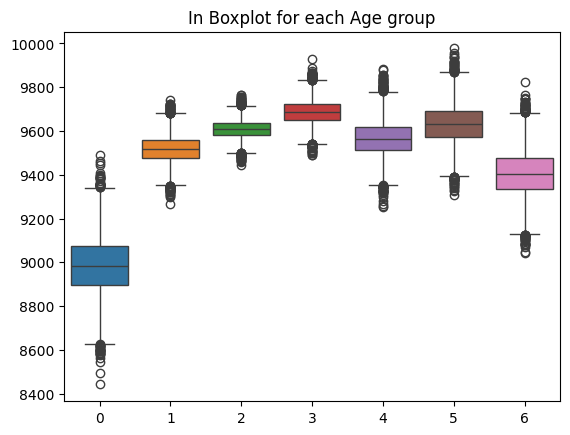

In [65]:
sns.boxplot([bootstrapped_pop_age0_17,bootstrapped_pop_age18_25,bootstrapped_pop_age26_35,bootstrapped_pop_age36_45,bootstrapped_pop_age46_50,bootstrapped_pop_age51_55,bootstrapped_pop_age_above_55])
plt.title('In Boxplot for each Age group')
plt.show()

In [66]:
# in above boxplot:
# 0-17  ->    0
# 18-25 ->    1
# 26-35 ->    2
# 36-45 ->    3
# 46-50 ->    4
# 51-55 ->    5
# 55+   ->    6
# In above chart there are both cases of overlapping and not overlapping between Age boxes, 
# so that for some cases difference is significant and for some cases difference is not significant.  

# CI of avg purchase of population for each City at 95% CL.

In [67]:
# saperate the city data:
groupby_city = df.groupby(by='City_Category')
city_a = groupby_city.get_group('A')
city_b = groupby_city.get_group('B')
city_c = groupby_city.get_group('C')

In [68]:
# purchase CI for City A :
sample_city_a = city_a.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_city_a = []
for i in range(10000):
    pop_sample = np.random.choice(sample_city_a,1045).mean()
    bootstrapped_pop_city_a.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_city_a,2.5)
x2 = np.percentile(bootstrapped_pop_city_a,97.5)
x1,x2

(9255.497711089462, 9476.314924190685)

In [69]:
# purchase CI for City B :
sample_city_b = city_b.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_city_b = []
for i in range(10000):
    pop_sample = np.random.choice(sample_city_b,1707).mean()
    bootstrapped_pop_city_b.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_city_b,2.5)
x2 = np.percentile(bootstrapped_pop_city_b,97.5)
x1,x2

(9368.132886947886, 9535.154800069053)

In [70]:
# purchase CI for City C :
sample_city_c = city_c.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_city_c = []
for i in range(10000):
    pop_sample = np.random.choice(sample_city_c,3139).mean()
    bootstrapped_pop_city_c.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_city_c,2.5)
x2 = np.percentile(bootstrapped_pop_city_c,97.5)
x1,x2

(9631.320176502024, 9768.685353191757)

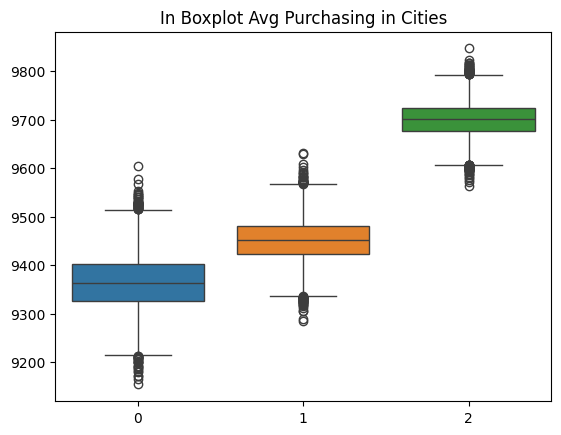

In [71]:
sns.boxplot([bootstrapped_pop_city_a,bootstrapped_pop_city_b,bootstrapped_pop_city_c])
plt.title('In Boxplot Avg Purchasing in Cities')
plt.show()

In [72]:
# In above boxplot:
# 0 for city A, 1 for city B and 2 for city C. 
# In above chart cities C&A, C&B  there is no overlapping between two boxes, so that the difference is significant.
# In above chart cities A&B  there is overlapping between two boxes, so that the difference is not significant.

# City wise Male and Female comparing

## CI for avg purchase for population Gender wise in City A : 

In [73]:
cityA_male = city_a.loc[city_a['Gender']=='M']
cityA_female = city_a.loc[city_a['Gender']=='F']

In [74]:
# purchase CI for City A male :
cityA_male_sample = cityA_male.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityA_male = []
for i in range(10000):
    pop_sample = np.random.choice(cityA_male_sample,750).mean()
    bootstrapped_pop_cityA_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityA_male,2.5)
x2 = np.percentile(bootstrapped_pop_cityA_male,97.5)
x1,x2

(9421.451562431273, 9683.080327853433)

In [75]:
# purchase CI for City A female :
cityA_female_sample = cityA_female.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityA_female = []
for i in range(10000):
    pop_sample = np.random.choice(cityA_female_sample,295).mean()
    bootstrapped_pop_cityA_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityA_female,2.5)
x2 = np.percentile(bootstrapped_pop_cityA_female,97.5)
x1,x2

(8695.716823909244, 9086.050767450308)

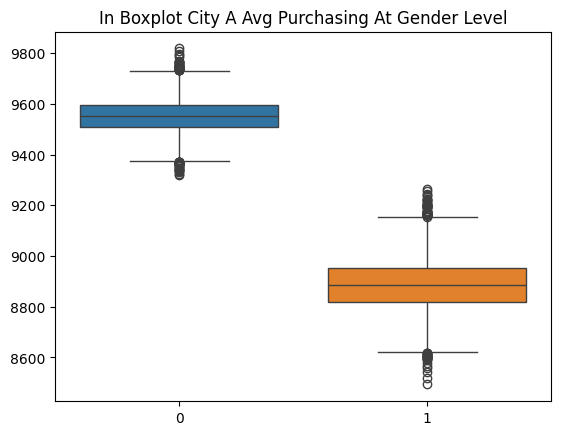

In [76]:
sns.boxplot([bootstrapped_pop_cityA_male,bootstrapped_pop_cityA_female])
plt.title('In Boxplot City A Avg Purchasing At Gender Level')
plt.show()

In [77]:
# In above boxplot 0 for unmarried male and 1 for unmarried female. 
# In above chart there is no overlapping between two boxes, so that the difference is significant.  

## CI for avg purchase for population Gender wise in City B : 

In [78]:
cityB_male = city_b.loc[city_b['Gender']=='M']
cityB_female = city_b.loc[city_b['Gender']=='F']

In [79]:
# purchase CI for City B male :
cityB_male_sample = cityB_male.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityB_male = []
for i in range(10000):
    pop_sample = np.random.choice(cityB_male_sample,1204).mean()
    bootstrapped_pop_cityB_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityB_male,2.5)
x2 = np.percentile(bootstrapped_pop_cityB_male,97.5)
x1,x2

(9644.797920075043, 9846.678623772796)

In [80]:
# purchase CI for City B female :
cityB_female_sample = cityB_female.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityB_female = []
for i in range(10000):
    pop_sample = np.random.choice(cityB_female_sample,503).mean()
    bootstrapped_pop_cityB_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityB_female,2.5)
x2 = np.percentile(bootstrapped_pop_cityB_female,97.5)
x1,x2

(8618.565037908686, 8885.096828223857)

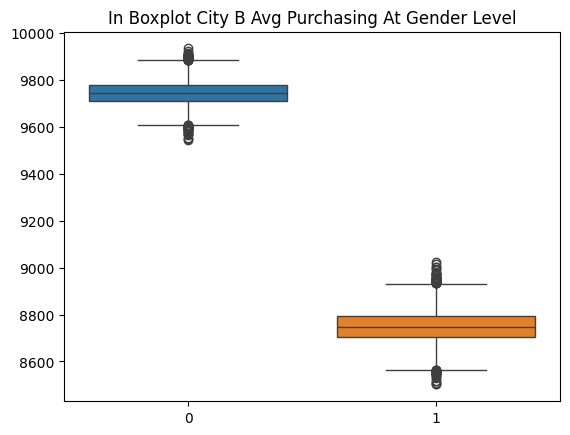

In [81]:
sns.boxplot([bootstrapped_pop_cityB_male,bootstrapped_pop_cityB_female])
plt.title('In Boxplot City B Avg Purchasing At Gender Level')
plt.show()

In [82]:
# In above boxplot 0 for unmarried male and 1 for unmarried female. 
# In above chart there is no overlapping between two boxes, so that the difference is significant.  

## CI for avg purchase for population Gender wise in City C :

In [83]:
cityC_male = city_c.loc[city_c['Gender']=='M']
cityC_female = city_c.loc[city_c['Gender']=='F']

In [84]:
# purchase CI for City C male :
cityC_male_sample = cityC_male.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityC_male = []
for i in range(10000):
    pop_sample = np.random.choice(cityC_male_sample,2271).mean()
    bootstrapped_pop_cityC_male.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityC_male,2.5)
x2 = np.percentile(bootstrapped_pop_cityC_male,97.5)
x1,x2

(9840.453906571656, 10004.971991108232)

In [85]:
# purchase CI for City C female :
cityC_female_sample = cityC_female.groupby(by='User_ID')['Purchase'].mean()
bootstrapped_pop_cityC_female = []
for i in range(10000):
    pop_sample = np.random.choice(cityC_female_sample,868).mean()
    bootstrapped_pop_cityC_female.append(pop_sample)
x1 = np.percentile(bootstrapped_pop_cityC_female,2.5)
x2 = np.percentile(bootstrapped_pop_cityC_female,97.5)
x1,x2

(9000.937550903123, 9236.627485031542)

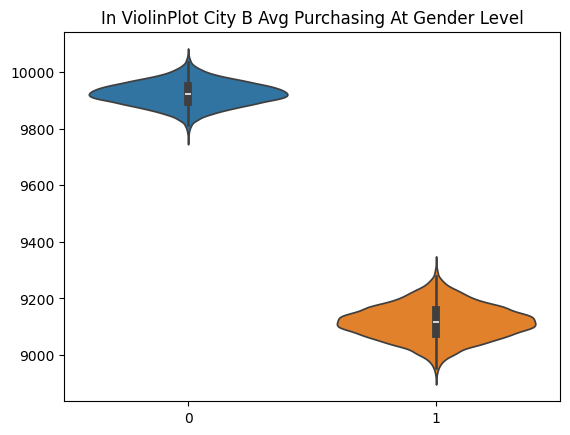

In [86]:
sns.violinplot([bootstrapped_pop_cityC_male,bootstrapped_pop_cityC_female])
plt.title('In ViolinPlot City B Avg Purchasing At Gender Level')
plt.show()

In [87]:
# In above violinplot 0 for unmarried male and 1 for unmarried female. 
# In above chart there is no overlapping between two boxes, so that the difference is significant.  

 ## IN All Cities Avg prchase by male and Female.

<AxesSubplot:>

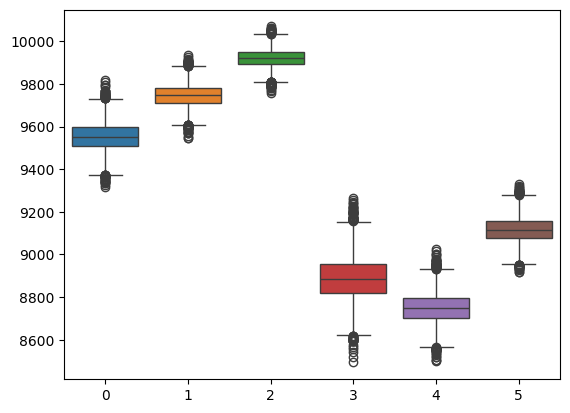

In [88]:
sns.boxplot([bootstrapped_pop_cityA_male,
                bootstrapped_pop_cityB_male,
                bootstrapped_pop_cityC_male,
             bootstrapped_pop_cityA_female,
             bootstrapped_pop_cityB_female,
             bootstrapped_pop_cityC_female])

In [89]:
# In this above boxplot we easily see city wise Male-Female, Male-Male, Female-Female difference.

## Avg purchase CI for Gender wise who lives 0 years in there at 95% CL.

In [90]:
male_0year = male_data.loc[male_data['Stay_In_Current_City_Years']=='0']
female_0year = female_data.loc[female_data['Stay_In_Current_City_Years']=='0']

In [91]:
male_0sample = male_0year.groupby(by='User_ID')['Purchase'].mean()
male_0sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(male_0sample,558).mean()
    male_0sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(male_0sample_bts_pop_means,2.5)
x2 = np.percentile(male_0sample_bts_pop_means,97.5)
x1,x2

(9589.322136580902, 9883.1449865945)

In [92]:
female_0sample = female_0year.groupby(by='User_ID')['Purchase'].mean()
# female_0sample
female_0sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(female_0sample,214).mean()
    female_0sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(female_0sample_bts_pop_means,2.5)
x2 = np.percentile(female_0sample_bts_pop_means,97.5)
x1,x2

(8616.508763088435, 9133.19878141251)

## Avg purchase CI for Gender wise who lives 1 years in there at 95% CL

In [93]:
male_1year = male_data.loc[male_data['Stay_In_Current_City_Years']=='1']
female_1year = female_data.loc[female_data['Stay_In_Current_City_Years']=='1']

In [94]:
male_1sample = male_1year.groupby(by='User_ID')['Purchase'].mean()
male_1sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(male_1sample,1482).mean()
    male_1sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(male_1sample_bts_pop_means,2.5)
x2 = np.percentile(male_1sample_bts_pop_means,97.5)
x1,x2,len(male_1sample)

(9708.03650980215, 9908.527967610746, 1482)

In [95]:
female_1sample = female_1year.groupby(by='User_ID')['Purchase'].mean()
# female_0sample
female_1sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(female_1sample,604).mean()
    female_1sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(female_1sample_bts_pop_means,2.5)
x2 = np.percentile(female_1sample_bts_pop_means,97.5)
x1,x2,len(female_1sample)

(8838.311091772826, 9101.024261538227, 604)

## Avg purchase CI for Gender wise who lives 2 years in there at 95% CL

In [96]:
male_2year = male_data.loc[male_data['Stay_In_Current_City_Years']=='2']
female_2year = female_data.loc[female_data['Stay_In_Current_City_Years']=='2']

In [97]:
male_2sample = male_2year.groupby(by='User_ID')['Purchase'].mean()
male_2sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(male_2sample,817).mean()
    male_2sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(male_2sample_bts_pop_means,2.5)
x2 = np.percentile(male_2sample_bts_pop_means,97.5)
x1,x2,len(male_2sample)

(9677.498474059184, 9946.266422172579, 817)

In [98]:
female_2sample = female_2year.groupby(by='User_ID')['Purchase'].mean()
# female_0sample
female_2sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(female_2sample,328).mean()
    female_2sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(female_2sample_bts_pop_means,2.5)
x2 = np.percentile(female_2sample_bts_pop_means,97.5)
x1,x2,len(female_2sample)


(8686.750073041421, 9040.565356367544, 328)

## Avg purchase CI for Gender wise who lives 3 years in there at 95% CL

In [99]:
male_3year = male_data.loc[male_data['Stay_In_Current_City_Years']=='3']
female_3year = female_data.loc[female_data['Stay_In_Current_City_Years']=='3']

In [100]:
male_3sample = male_3year.groupby(by='User_ID')['Purchase'].mean()
male_3sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(male_3sample,693).mean()
    male_3sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(male_3sample_bts_pop_means,2.5)
x2 = np.percentile(male_3sample_bts_pop_means,97.5)
x1,x2,len(male_3sample)

(9737.761570853603, 10008.021391893568, 693)

In [101]:
female_3sample = female_3year.groupby(by='User_ID')['Purchase'].mean()
# female_0sample
female_3sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(female_3sample,286).mean()
    female_3sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(female_3sample_bts_pop_means,2.5)
x2 = np.percentile(female_3sample_bts_pop_means,97.5)
x1,x2,len(female_3sample)

(8898.619559622923, 9302.14750625408, 286)

## Avg purchase CI for Gender wise who lives 4+ years in there at 95% CL

In [102]:
male_4year = male_data.loc[male_data['Stay_In_Current_City_Years']=='4+']
female_4year = female_data.loc[female_data['Stay_In_Current_City_Years']=='4+']

In [103]:
male_4sample = male_4year.groupby(by='User_ID')['Purchase'].mean()
male_4sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(male_4sample,675).mean()
    male_4sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(male_4sample_bts_pop_means,2.5)
x2 = np.percentile(male_4sample_bts_pop_means,97.5)
x1,x2,len(male_4sample)

(9656.055421656156, 9930.807552856751, 675)

In [104]:
female_4sample = female_4year.groupby(by='User_ID')['Purchase'].mean()
# female_0sample
female_4sample_bts_pop_means = []
for i in range(10000):
    sample = np.random.choice(female_4sample,234).mean()
    female_4sample_bts_pop_means.append(sample)
# len(bts_pop_means)
x1 = np.percentile(female_4sample_bts_pop_means,2.5)
x2 = np.percentile(female_4sample_bts_pop_means,97.5)
x1,x2,len(female_4sample)

(8815.176843033083, 9228.470773193036, 234)

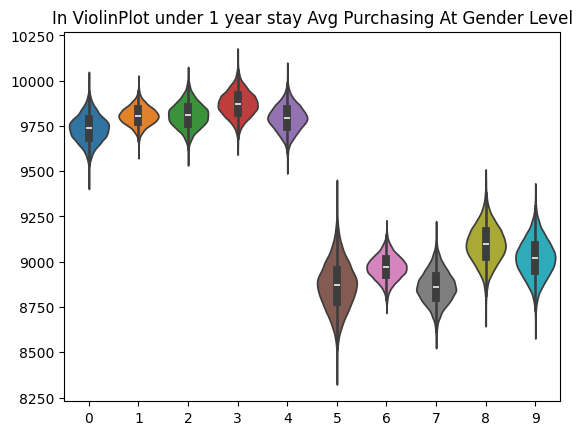

In [105]:
sns.violinplot([male_0sample_bts_pop_means,
                male_1sample_bts_pop_means,
                male_2sample_bts_pop_means,
                male_3sample_bts_pop_means,
                male_4sample_bts_pop_means,
                female_0sample_bts_pop_means,
               female_1sample_bts_pop_means,
               female_2sample_bts_pop_means,
               female_3sample_bts_pop_means,
               female_4sample_bts_pop_means])
plt.title('In ViolinPlot under 1 year stay Avg Purchasing At Gender Level')
plt.show()

## Insights of Walmart DataSet with the help of above plots :

##### * 1. On the bases of above all CI(confidence intervals) with 95% Confidence level On Black Friday Male purchasing average is higher than Female.
#####    2. In this sample dataset maximum ordered placed in City B. 
#####    3. Males are dominating in each category, Irrespective of whether if it is City A,B or C.
#####    4. On BlackFriday, Males purchasing more than females. 
#####    5. In given data, order placed by Age groups, 26-35 group is at the top & 0-17 is last in the line.Max outlier are in 26-35 Age Group.
#####    6. Product Category "5" is the most purchasing category by all customers. 
#####        but Individually Males purchase most in the "1" category and female purchase most in the "5" category *

## Some recommendations for walmart, that could help.

##### 1. Married female purchase less than Unmarried female  
##### 2. we have to more focus on Age groups on 0-17,51-55,55+. In these groups have less number of orders. we could give some offer for them.
##### 3. For some product category [9,17,14,19] we could create some deal to grow the sales in these category.
##### 4. Occupation wise [8,9,13,18,19] we have to create some deals or offer to attract those one.